In [12]:
# Import libraries and Warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import string
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# ML Classifcation Model
from sklearn.naive_bayes import MultinomialNB

# validation metrics
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

In [13]:
# NLP libraries
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# Import Data

data=pd.read_csv('/content/drive/MyDrive/Data Science/Practice - ML/Note books/NLP/IMDB Dataset.csv')

In [15]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
# Understanding the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [17]:
round(data['sentiment'].value_counts(normalize=True)*100,2)

,proportion
sentiment,
positive,50.0
negative,50.0


In [18]:
# stats nature of the text column wrt target
data.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
negative   25000  24698  Nickelodeon has gone down the toilet. They hav...   
positive   25000  24884  Loved today's show!!! It was a variety and not...   

                
          freq  
sentiment       
negative     3  
positive     5

In [19]:
# function to remove stopwords and puntuations
def text_preprocessing(message):
    lower_text = message.lower() #Lower
    clean_text = ''.join([char for char in lower_text if char not in string.punctuation]) # Remove Punctuation
    return ' '.join([word for word in clean_text.split() if word.lower() not in stopwords.words('english')]) # Remove Stopwords

In [20]:
# encode the target
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})

# data sample
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [21]:
# removing the stopwords and puntuations manually
data['clean_text'] = data['review'].apply(text_preprocessing)

In [22]:
# sample data after preprocessing
data.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...


In [23]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(data['clean_text'], data['sentiment'], test_size=0.2, random_state=42)

# vectorization
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

In [24]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)
print('Training Score:', round(model.score(x_train_tfidf, y_train)*100, 2), '%')

Training Score: 91.78 %


Testing Score: 87.01 %

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.86      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



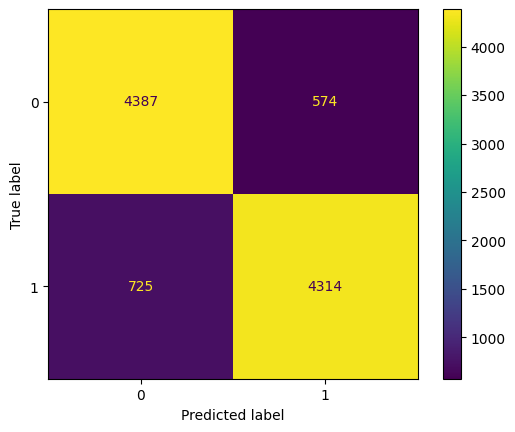

In [25]:
# model testing
y_pred = model.predict(x_test_tfidf)

# metrics
print('Testing Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('\nClassification Report:\n\n', report)

In [ ]:
# Save model & vectorizer
joblib.dump(model, "/content/drive/MyDrive/Data Science/Practice - ML/Note books/NLP/sentiment-analysis/model.pkl")
joblib.dump(vectorizer, "/content/drive/MyDrive/Data Science/Practice - ML/Note books/NLP/sentiment-analysis/vectorizer.pkl")

['/content/drive/MyDrive/Data Science/Practice - ML/Note books/NLP/sentiment-analysis/vectorizer.pkl']